---
# **Regression Using Different Machine Learning Models-Random Forest**
---



---
#### **The Data Set is taken from the UCI Machine Learning Repository Regression using different method are performed and the model performance is checked**
---




---
### **Importing the Libraries**
---





In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

---
 ### **Importing the DataSet**
---

In [25]:
df=pd.read_csv("/content/drive/MyDrive/DATA_SCIENCE_HOBBY_PROJECT/Combined_Cycle_Power_Plant.csv")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90




---
### **Making copy of original DataSet**
---





In [26]:
df1=df.copy()



---
#### **Method 4: Model Formation and Prediction using Random Forest Method**
---







---
##### **Creation of Independent and Dependent Variable**
---





In [27]:
X=df1.iloc[:,:-1]
y=df1['PE']



---
##### **Splitting the dataset into the Training set and Test set**
---





In [28]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



---
##### **Training the Multiple Linear Regression model on the Training set**
---





In [29]:
regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)



---
##### **Predicting the Test set results**
---






In [30]:
y_hat_test=regressor.predict(X_test)
y_hat_train=regressor.predict(X_train)



---
##### **Model Performance Evaluation**
---








---
###### **Model Performance Evaluation-Test**
---






In [31]:
MAE=mean_absolute_error(y_test,y_hat_test)
MSE=mean_squared_error(y_test,y_hat_test)
RMSE=math.sqrt(MSE)
MAPE=(MAE/np.mean(y_test))*100
R_Squared=r2_score(y_test,y_hat_test)
print(f"\n\nMAE={MAE:0.2f}\n\nMSE={MSE:0.2f}\n\nRMSE={RMSE:0.2f}\n\nMAPE={MAPE:0.2f}%\n\nR-Squared={R_Squared:0.2f}")



MAE=2.34

MSE=10.23

RMSE=3.20

MAPE=0.52%

R-Squared=0.97




---
###### **Model Performance Evaluation-Train**
---






In [32]:
MAE=mean_absolute_error(y_train,y_hat_train)
MSE=mean_squared_error(y_train,y_hat_train)
RMSE=math.sqrt(MSE)
MAPE=(MAE/np.mean(y_train))*100
R_Squared=r2_score(y_train,y_hat_train)
print(f"\n\nMAE={MAE:0.2f}\n\nMSE={MSE:0.2f}\n\nRMSE={RMSE:0.2f}\n\nMAPE={MAPE:0.2f}%\n\nR-Squared={R_Squared:0.2f}")



MAE=0.88

MSE=1.59

RMSE=1.26

MAPE=0.19%

R-Squared=0.99




---
###### **Distribution curve to assess Bias or Variance**
---






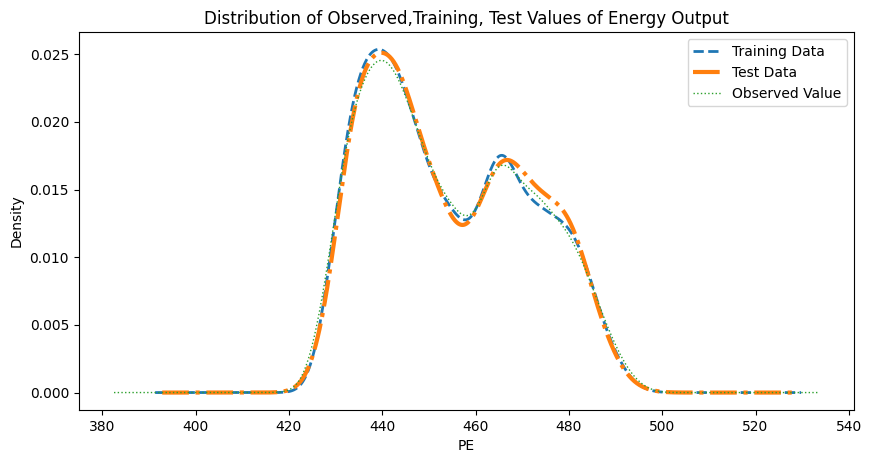

The model is a very fit to observed values. As we can see Model performance parameters are almost same


In [33]:
plt.figure(figsize=(10,5),dpi=100)
pd.Series(y_hat_train).sort_values().plot(kind='kde',label="Training Data",ls="--",lw=2)
pd.Series(y_hat_test).sort_values().plot(kind='kde',label="Test Data",ls="-.",lw=3)
y.sort_values().plot(kind='kde',label="Observed Value",ls=":",lw=1)
plt.ylabel("Density")
plt.xlabel("PE")
plt.title("Distribution of Observed,Training, Test Values of Energy Output")
plt.legend()
plt.show()
print("The model is a very fit to observed values. As we can see Model performance parameters are almost same")